In [2]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import copy, math
from numpy import genfromtxt

## Concerns housing values in suburbs of Boston.

- Number of Instances: 506
- Number of Attributes: 13 continuous attributes (including "class"
- attribute "MEDV"), 1 binary-valued attribute.
- Attribute Information:
- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's
- Missing Attribute Values: None.

link - https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset

## 1. Data import

In [3]:
#import data as well as header separately

housing_data_filename = "C:/Users/Omordia/Downloads/assignment-solution Updated/assignment-solution/housing-data.csv"

#import data without header
all_data = genfromtxt(housing_data_filename, delimiter=',', skip_header=1)

all_data_with_header = np.genfromtxt(housing_data_filename, delimiter=",", skip_header=0, dtype=None)
header_names = [name.decode('UTF-8') for name in all_data_with_header[0,:]][0:]

C:\Users\Omordia\AppData\Local\Temp\ipykernel_13384\3432357606.py:8: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  all_data_with_header = np.genfromtxt(housing_data_filename, delimiter=",", skip_header=0, dtype=None)


In [4]:
print(header_names)

all_data.shape

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


(511, 14)

## 2. Preprocessing

In [5]:
#seprate data into features and labels.

label_col = all_data.shape[1]-1
X_train = all_data[:,0:label_col]
y_train = all_data[:,label_col]
X_features = header_names[0:label_col]
X_features

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [6]:
#count the number of NAN in numpy array
print(X_train[10, :])
np.count_nonzero(np.isnan(X_train))
print(X_train.shape)

[2.2489e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01        nan
 9.4300e+01 6.3467e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9252e+02
 2.0450e+01]
(511, 13)


In [16]:
#Replace NAN with 0 and infinity with very large number
X_train = np.nan_to_num(X_train)

## 3. Functions for cost, gradient and gradient descent

In [8]:
def compute_cost_linear_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): label
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m  = X.shape[0]
    n  = len(w)
    cost = 0.
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b                                   
        cost = cost + (f_wb_i - y[i])**2                                           
    cost = cost / (2 * m)                                               
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                         
    reg_cost = (lambda_/(2*m)) * reg_cost                             
    
    total_cost = cost + reg_cost                                       

    return total_cost

In [9]:
def compute_gradient_linear_reg(X, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * X[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [10]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, lambda_, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha and uses regularization lambda_
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : labels
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      lambda_(float)      : Regularization
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient
        dj_db,dj_dw = gradient_function(X, y, w, b,lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw              
        b = b - alpha * dj_db               
      
        # Save cost at each iteration
        if i<100000:       
            J_history.append( cost_function(X, y, w, b,lambda_))
        
    return w, b, J_history

## 4. Feature scaling using zscore normalization

In [11]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)


In [12]:
#print()
X_normalized_tuple = zscore_normalize_features(X_train)
X_train_feature_scaled = X_normalized_tuple[0]


## 5. Fit function that uses Gradient Descent

In [13]:
# Function to find w and b
def fit(X, y, w_in, b_in, compute_cost, gradient_function, start_alpha, lambda_, num_iters):
    """
    Computes gradient descent using various learning rates decreasing from start_alpha
    Returns the parameters (w,b) with the best cost
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : labels
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      start_alpha (float) : Start Learning rate
      lambda_(float)      : Regularization
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    #we start at start_alpha and decrease. if the cost increases as we decrease learning rate, we exit
    #and return the optimal solution
    last_cost = float('inf')
    optimal_alpha = start_alpha
    optimal_cost = float('inf')
    w_final =np.zeros((X.shape[1],))
    b_final = 0
    
    while True:
        # initialize parameters
        print("")
        print("Running gradient descent with alpha: ",start_alpha )
       
        initial_w = np.zeros((13,), dtype=float)
        initial_b = 0.
        # some gradient descent settings
        iterations = 10000
        alpha = start_alpha
        # run gradient descent 
        w_final_temp, b_final_temp, J_hist = gradient_descent(X_train_feature_scaled, y_train, initial_w, initial_b,
                                                    compute_cost, gradient_function, 
                                                    alpha, lambda_, iterations)
        last_cost = J_hist[-1]
        if math.isnan(last_cost):
            print("Skipping to next alpha")
        else:
            if round(last_cost,2) < optimal_cost:
                w_final = w_final_temp
                b_final = b_final_temp
                optimal_alpha = start_alpha
                optimal_cost = round(last_cost,2)
                print(f"Cost {J_hist[-1]:8.2f} ")
            else:
                break
        
        start_alpha = start_alpha/3
    
    print(" ")
    print("Optimal alpha found",optimal_alpha )
    return (w_final, b_final, J_hist)
            
            

## 6. Run Fit and predict

In [14]:
# initialize parameters
initial_w = np.zeros((13,), dtype=float)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 0.3
lambda_ = 0.1
# run gradient descent 
w_final, b_final, J_hist = fit(X_train_feature_scaled, y_train, initial_w, initial_b,
                                                    compute_cost_linear_reg, compute_gradient_linear_reg, 
                                                    alpha, lambda_, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train_feature_scaled.shape
y_pred = np.dot(X_train_feature_scaled, w_final) + b_final 
for i in range(m):
    print(f"prediction: {np.dot(X_train_feature_scaled[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")


Running gradient descent with alpha:  0.3
Cost    19.34 

Running gradient descent with alpha:  0.09999999999999999
 
Optimal alpha found 0.3
b,w found by gradient descent: 22.68,[-1.44133076  1.45645038 -0.61896586  0.82789612 -2.24953453  2.63503872
 -0.90603602 -3.97812826  2.4108098  -2.48152102 -1.68007614  0.91909906
 -1.69622627] 
prediction: 28.99, target value: 24.0
prediction: 24.49, target value: 21.6
prediction: 28.30, target value: 34.7
prediction: 26.98, target value: 33.4
prediction: 26.63, target value: 36.2
prediction: 24.47, target value: 28.7
prediction: 23.31, target value: 22.9
prediction: 20.61, target value: 27.1
prediction: 16.24, target value: 16.5
prediction: 19.59, target value: 18.9
prediction: 2.16, target value: 15.0
prediction: 21.34, target value: 18.9
prediction: 23.29, target value: 21.7
prediction: 20.00, target value: 20.4
prediction: 19.54, target value: 18.2
prediction: 20.19, target value: 19.9
prediction: 21.60, target value: 23.1
prediction: 18

## 7. Plots

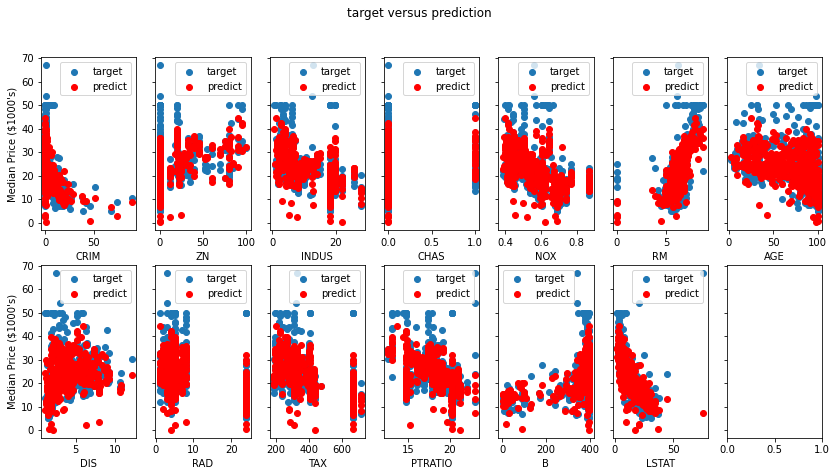

In [15]:
# plot predictions and targets vs original features    
fig,ax=plt.subplots(2,7,figsize=(14,7),sharey=True)

for i in range(X_train.shape[1]):
    row = int(i / 7)
    col = int(i % 7)
    ax[row, col].scatter(X_train[:,i],y_train, label = 'target')
    ax[row,col].set_xlabel(X_features[i])
    ax[row,col].scatter(X_train[:,i],y_pred,color='r', label = 'predict')
    ax[row,col].legend();
ax[0,0].set_ylabel("Median Price ($1000's)"); 
ax[1,0].set_ylabel("Median Price ($1000's)");
fig.suptitle("target versus prediction")
plt.show()